<a href="https://colab.research.google.com/github/DanielaNavaGarcia/programas-m-todos-/blob/main/Interpolaci%C3%B3n_de_Hermite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

en estas entradas encontramos las funciones de interpolacion de Hermite para el dominio [-1,1]. Luego,las usamos para una interpolación a trozos.

In [30]:
from __future__ import division
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

Se requiere encontrar una base con funciones que satisfagan:
N1(x1)=1
N1(x2)=0
N2(x1)=1
N2(x2)=0
N'3(x1)=1
N'3(x2)=0
N'4(x1)=1
N'4(x2)=0

In [31]:
x1, x2, x = sym.symbols("x1 x2 x")
V = sym.Matrix([
    [1, x1, x1**2, x1**3],
    [1, x2, x2**2, x2**3],
    [0, 1, 2*x1, 3*x1**2],
    [0, 1, 2*x2, 3*x2**2]])
V

Matrix([
[1, x1, x1**2,   x1**3],
[1, x2, x2**2,   x2**3],
[0,  1,  2*x1, 3*x1**2],
[0,  1,  2*x2, 3*x2**2]])

In [32]:
sym.simplify(V.inv())

Matrix([
[x2**2*(3*x1 - x2)/(x1**3 - 3*x1**2*x2 + 3*x1*x2**2 - x2**3), x1**2*(x1 - 3*x2)/(x1**3 - 3*x1**2*x2 + 3*x1*x2**2 - x2**3),      -x1*x2**2/(x1**2 - 2*x1*x2 + x2**2),      -x1**2*x2/(x1**2 - 2*x1*x2 + x2**2)],
[         -6*x1*x2/(x1**3 - 3*x1**2*x2 + 3*x1*x2**2 - x2**3),           6*x1*x2/(x1**3 - 3*x1**2*x2 + 3*x1*x2**2 - x2**3), x2*(2*x1 + x2)/(x1**2 - 2*x1*x2 + x2**2), x1*(x1 + 2*x2)/(x1**2 - 2*x1*x2 + x2**2)],
[      3*(x1 + x2)/(x1**3 - 3*x1**2*x2 + 3*x1*x2**2 - x2**3),      3*(-x1 - x2)/(x1**3 - 3*x1**2*x2 + 3*x1*x2**2 - x2**3),   (-x1 - 2*x2)/(x1**2 - 2*x1*x2 + x2**2),   (-2*x1 - x2)/(x1**2 - 2*x1*x2 + x2**2)],
[               -2/(x1**3 - 3*x1**2*x2 + 3*x1*x2**2 - x2**3),                 2/(x1**3 - 3*x1**2*x2 + 3*x1*x2**2 - x2**3),              1/(x1**2 - 2*x1*x2 + x2**2),              1/(x1**2 - 2*x1*x2 + x2**2)]])

In [33]:
V_inv = sym.simplify(V.subs({x1:-1, x2:1}).inv())
V_inv

Matrix([
[ 1/2,  1/2,  1/4, -1/4],
[-3/4,  3/4, -1/4, -1/4],
[   0,    0, -1/4,  1/4],
[ 1/4, -1/4,  1/4,  1/4]])

In [34]:
sym.factor(V_inv.T * sym.Matrix([1, x, x**2, x**3]))

Matrix([
[       x**3/4 - 3*x/4 + 1/2],
[      -x**3/4 + 3*x/4 + 1/2],
[x**3/4 - x**2/4 - x/4 + 1/4],
[x**3/4 + x**2/4 - x/4 - 1/4]])

In [36]:
def hermite_interp(fun, grad, x0=-1, x1=1, npts=101):
    jaco = (x1 - x0)/2
    x = np.linspace(-1, 1, npts)
    f1 = fun(x0)
    f2 = fun(x1)
    g1 = grad(x0)
    g2 = grad(x1)
    N1 = 1/4*(x - 1)**2 * (2 + x)
    N2 = 1/4*(x + 1)**2 * (2 - x)
    N3 = 1/4*(x - 1)**2 * (x + 1)
    N4 = 1/4*(x + 1)**2 * (x - 1)
    interp = N1*f1 + N2*f2 + jaco*(N3*g1 + N4*g2)
    return interp

In [26]:
def fun(x):
    return np.sin(2*np.pi*x)/(2*np.pi*x)


def grad(x):
    return np.cos(2*np.pi*x)/x - np.sin(2*np.pi*x)/(2*np.pi*x**2)

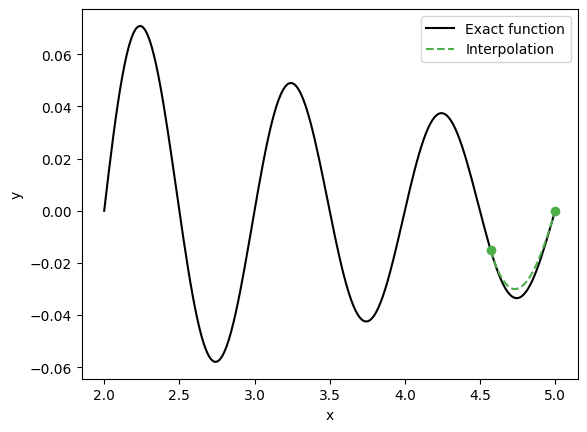

In [25]:
a = 2
b = 5
nels = 7
npts = 200
x = np.linspace(a, b, npts)
y = fun(x)
plt.plot(x, y, color="black")
xi = np.linspace(a, b, num=nels, endpoint=False)
dx = xi[1] - xi[0]
for x0 in xi:
    x1 = x0 + dx
    x = np.linspace(x0, x1, npts)
    y = hermite_interp(fun, grad, x0=x0, x1=x1, npts=npts)
plt.plot(x, y, linestyle="dashed", color="#4daf4a")
plt.plot([x[0], x[-1]], [y[0], y[-1]], marker="o", color="#4daf4a",
         linewidth=0)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Exact function", "Interpolation"])
plt.show()